In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import TruncatedSVD
import random
# import seaborn as sns
import os.path as path
import os
import matplotlib
import matplotlib.font_manager
import matplotlib.pyplot as plt # graphs plotting
from Bio import SeqIO # some BioPython that will come in handy
#matplotlib inline
import numpy
import csv 

from matplotlib import rc

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn import svm

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler  
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import classification_report, confusion_matrix 

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from pandas import DataFrame

from sklearn.model_selection import KFold 
from sklearn.model_selection import RepeatedKFold

from sklearn.metrics import confusion_matrix

from numpy import mean


from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

import statistics

from sklearn.cluster import KMeans

from sklearn.datasets import load_digits
from sklearn.decomposition import KernelPCA

import math
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import confusion_matrix

# for Arial typefont
matplotlib.rcParams['font.family'] = 'Arial'


## for Palatino and other serif fonts use:
# rc('font',**{'family':'serif','serif':['Palatino']})
# matplotlib.rcParams['mathtext.fontset'] = 'cm'

## for LaTeX typefont
# matplotlib.rcParams['mathtext.fontset'] = 'stix'
# matplotlib.rcParams['font.family'] = 'STIXGeneral'

## for another LaTeX typefont
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

# rc('text', usetex = True)

print("Packages imported")

Packages imported


In [231]:
# dt_name = "third"

# read_path = "D:/University/RA/covid_origin/Dataset/" + str(dataset_nam) + " Dataset/" + str(dataset_nam) + "_dataset_dataframe_Host_names_data.csv"
read_path = "D:/University/RA/covid_origin/Dataset/Merged Data/final_merged_data_other_attributes.csv"

host_names_new = []
# host_names_ne = []

with open(read_path) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        tmp = row
#         host_names_new.append(', '.join(row))
        host_names_new.append(tmp)
    


In [227]:
read_path = "D:/University/RA/covid_origin/Dataset/Merged Data/final_merged_data_protein_sequences.csv"

protein_seq = []

with open(read_path) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        tmp = row
        protein_seq.append(tmp)

In [232]:
alligned_prot_ser = []
alligned_host_names = []
only_host_names = []
for i in range(len(protein_seq)):
    if len(protein_seq[i])==1274:
        alligned_prot_ser.append(protein_seq[i])
        alligned_host_names.append(host_names_new[i])
        aa = host_names_new[i]
        only_host_names.append(aa[0])

In [238]:
write_path_11 = "D:/University/RA/covid_origin/Dataset/Merged Data/protein_sequences_aligned_visualization.csv"


with open(write_path_11, 'w', newline='') as file:
    writer = csv.writer(file)
    for i in range(0,len(alligned_prot_ser)):
        ccv = alligned_prot_ser[i]
        writer.writerow(ccv)

In [233]:
len(alligned_prot_ser),len(protein_seq),len(alligned_host_names),len(only_host_names)

(62657, 950686, 62657, 62657)

In [7]:
alligned_host_names[0]

['B.1.1.7',
 'hCoV-19^^England',
 'Lighthouse',
 'hCoV-19/England/MILK-B5A34F/2020',
 '11/6/2020']

In [6]:
np.unique(only_host_names)
idx = pd.Index(only_host_names) # creates an index which allows counting the entries easily
print('Here are all of the viral species in the dataset: \n', len(idx),"entries in total")
aq = (idx.value_counts())
print(aq)

Here are all of the viral species in the dataset: 
 62657 entries in total
P.1          26629
B.1.1.7      13966
B.1.427      12784
B.1.617.2     7551
B.1.351       1727
dtype: int64


# k-mers

In [33]:
def build_kmers(sequence, ksize):
    kmers = []
    n_kmers = len(sequence) - ksize + 1

    for i in range(n_kmers):
        kmer = sequence[i:i + ksize]
        kmers.append(kmer)

    return kmers

In [34]:
k_size_val = 3

protein_kmers_list = []
for protein_kmers in range(len(alligned_prot_ser)):
    print(protein_kmers, "/",len(alligned_prot_ser))
    k_mers_vals = build_kmers(alligned_prot_ser[protein_kmers],k_size_val)

    # str(k_mers_vals[0])
    k_mers_list = []
    for mers_ind in range(len(k_mers_vals)):
        k_mers_list.append(str(k_mers_vals[mers_ind]))
        
    protein_kmers_list.append(k_mers_list)

0 / 62657
1 / 62657
2 / 62657
3 / 62657
4 / 62657
5 / 62657
6 / 62657
7 / 62657
8 / 62657
9 / 62657
10 / 62657
11 / 62657
12 / 62657
13 / 62657
14 / 62657
15 / 62657
16 / 62657
17 / 62657
18 / 62657
19 / 62657
20 / 62657
21 / 62657
22 / 62657
23 / 62657
24 / 62657
25 / 62657
26 / 62657
27 / 62657
28 / 62657
29 / 62657
30 / 62657
31 / 62657
32 / 62657
33 / 62657
34 / 62657
35 / 62657
36 / 62657
37 / 62657
38 / 62657
39 / 62657
40 / 62657
41 / 62657
42 / 62657
43 / 62657
44 / 62657
45 / 62657
46 / 62657
47 / 62657
48 / 62657
49 / 62657
50 / 62657
51 / 62657
52 / 62657
53 / 62657
54 / 62657
55 / 62657
56 / 62657
57 / 62657
58 / 62657
59 / 62657
60 / 62657
61 / 62657
62 / 62657
63 / 62657
64 / 62657
65 / 62657
66 / 62657
67 / 62657
68 / 62657
69 / 62657
70 / 62657
71 / 62657
72 / 62657
73 / 62657
74 / 62657
75 / 62657
76 / 62657
77 / 62657
78 / 62657
79 / 62657
80 / 62657
81 / 62657
82 / 62657
83 / 62657
84 / 62657
85 / 62657
86 / 62657
87 / 62657
88 / 62657
89 / 62657
90 / 62657
91 / 6265

In [38]:
write_path_11 = "D:/University/RA/covid_origin/Dataset/Merged Data/merged_complete_kmers.csv"

Trial = 1

with open(write_path_11, 'w', newline='') as file:
    writer = csv.writer(file)
    for i in range(0,len(protein_kmers_list)):
        ccv = protein_kmers_list[i]
#         ccv.replace('\"','')
        writer.writerow(ccv)

In [8]:
write_path_11 = "D:/University/RA/covid_origin/Dataset/Merged Data/merged_complete_kmers_attributes.csv"

Trial = 1

with open(write_path_11, 'w', newline='') as file:
    writer = csv.writer(file)
    for i in range(0,len(alligned_host_names)):
        ccv = alligned_host_names[i]
#         ccv.replace('\"','')
        writer.writerow(ccv)

# Read k-mers file

In [22]:
read_path = "D:/University/RA/covid_origin/Dataset/Merged Data/merged_complete_kmers.csv"
prot_seq_k_mers = []
# host_names_ne = []

with open(read_path) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        tmp = row
#         host_names_new.append(', '.join(row))
        prot_seq_k_mers.append(tmp)

In [23]:
seq_kmers_final = []
for i in range(len(prot_seq_k_mers)):
    tmp = prot_seq_k_mers[i]
    tmp_seq = []
    for j in range(len(prot_seq_k_mers[i])):
        aa = tmp[j]
        aa_lst = str(list(aa))
        aa_lst_1 = aa_lst.replace(",","")
        aa_lst_2 = aa_lst_1.replace("[","")
        aa_lst_3 = aa_lst_2.replace("\"","")
        aa_lst_4 = aa_lst_3.replace("]","")
        aa_lst_5 = aa_lst_4.replace("'","")
        aa_lst_6 = aa_lst_5.replace(" ","")
        tmp_seq.append(aa_lst_6)
    seq_kmers_final.append(tmp_seq)

In [27]:
len(np.unique(seq_kmers_final[0]))

1113

In [63]:
flat_list = [item for sublist in seq_kmers_final for item in sublist]
len(flat_list)

79699704

In [64]:
unique_seq_kmers_final = np.unique(flat_list)

In [77]:
unique_seq_kmers_final_list = list(unique_seq_kmers_final)

# Generating Frequence Vectors from k-mers

In [84]:
frequency_vector = []
for i in range(len(seq_kmers_final)):
    seq_tmp = seq_kmers_final[i]
    listofzeros = [0] * len(unique_seq_kmers_final_list)
    for j in range(len(seq_tmp)):
        ind_tmp = unique_seq_kmers_final_list.index(seq_tmp[j])
        listofzeros[ind_tmp] = listofzeros[ind_tmp] + 1
    frequency_vector.append(listofzeros)
    


In [93]:
write_path_11 = "D:/University/RA/covid_origin/Dataset/Merged Data/merged_complete_kmers_frequency_vectors.csv"

Trial = 1

with open(write_path_11, 'w', newline='') as file:
    writer = csv.writer(file)
    for i in range(0,len(frequency_vector)):
        ccv = frequency_vector[i]
#         ccv.replace('\"','')
        writer.writerow(ccv)

# Reading Frequency Vector

In [2]:
read_path = "D:/University/RA/covid_origin/Dataset/Merged Data/merged_complete_kmers_frequency_vectors.csv"

frequency_vector_read = []
# host_names_ne = []

with open(read_path) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        tmp = row
#         host_names_new.append(', '.join(row))
        frequency_vector_read.append(tmp)

In [3]:

frequency_vector_read_int = []

for u in range(len(frequency_vector_read)):
    aa = frequency_vector_read[u]
    test_list = []
    for i in range(0, len(aa)):
        test_list.append(int(aa[i]))
        
    frequency_vector_read_int.append(test_list)

In [4]:
len(frequency_vector_read_int[0])

4977

In [235]:
read_path = "D:/University/RA/covid_origin/Dataset/Merged Data/merged_complete_kmers_attributes.csv"

host_names_new = []
host_names_ne = []

with open(read_path) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        tmp = row
#         host_names_new.append(', '.join(row))
        host_names_new.append(tmp[0])

In [237]:
len(host_names_new)
idx = pd.Index(host_names_new) # creates an index which allows counting the entries easily
print('Total:', len(idx),"entries in total")
aq = (idx.value_counts())
print(aq)

Total: 62657 entries in total
P.1          26629
B.1.1.7      13966
B.1.427      12784
B.1.617.2     7551
B.1.351       1727
dtype: int64


In [17]:
host_names_integers = []
for t in range(len(host_names_new)):
    if(host_names_new[t]=="P.1"):
        host_names_integers.append(1)
    elif(host_names_new[t]=="B.1.1.7"):
        host_names_integers.append(2)
    elif(host_names_new[t]=="B.1.427"):
        host_names_integers.append(3)
    elif(host_names_new[t]=="B.1.617.2"):
        host_names_integers.append(4)
    elif(host_names_new[t]=="B.1.351"):
        host_names_integers.append(5)
    

In [18]:
idx = pd.Index(host_names_integers) # creates an index which allows counting the entries easily
# print('Cluster Number:' + str(clust_val) + ' \n', len(idx),"entries in total")
aq = (idx.value_counts())
print(aq)

1    26629
2    13966
3    12784
4     7551
5     1727
dtype: int64


# Ridge Regression

In [29]:
ridge_data = pd.DataFrame(frequency_vector_read_int)

In [219]:
X_train, X_test, y_train, y_test = train_test_split(
    ridge_data,host_names_integers,
    test_size=0.3,
    random_state=0)
X_train.shape, X_test.shape

((43859, 4977), (18798, 4977))

In [220]:
scaler = StandardScaler()
scaler.fit(X_train.fillna(0))

# L1 = Lasso, L2 = Ridge
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1', solver='liblinear'))
sel_.fit(scaler.transform(X_train.fillna(0)), y_train)

sel_.get_support()

selected_feat = X_train.columns[(sel_.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))

total features: 4977
selected features: 964
features with coefficients shrank to zero: 23282


In [41]:
scaler = StandardScaler()
scaler.fit(X_train.fillna(0))

# L1 = Lasso, L2 = Ridge
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l2', solver='liblinear'))
sel_.fit(scaler.transform(X_train.fillna(0)), y_train)

sel_.get_support()

selected_feat_ridge = X_train.columns[(sel_.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat_ridge)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))

total features: 4977
selected features: 1242
features with coefficients shrank to zero: 1285


In [221]:
Ridge_Regression_data = sel_.transform(ridge_data.fillna(0))

In [222]:
Ridge_Regression_data.shape

(62657, 964)

# Applying PCA

In [18]:
svd = TruncatedSVD(n_components = 100, n_iter = 7, random_state = 42)
data_with_svd = svd.fit_transform(frequency_vector_read_int)


explained_variances = svd.explained_variance_ratio_

the_level = explained_variances.sum()

In [20]:
aa = data_with_svd[0]
type(aa[0])

numpy.float64

In [21]:
write_path_11 = "D:/University/RA/covid_origin/Dataset/Merged Data/merged_complete_kmers_frequency_vectors_PCA.csv"

Trial = 1

with open(write_path_11, 'w', newline='') as file:
    writer = csv.writer(file)
    for i in range(0,len(data_with_svd)):
        ccv = data_with_svd[i]
        writer.writerow(ccv)

In [ ]:
read_path = "D:/University/RA/covid_origin/Dataset/Merged Data/merged_complete_kmers_attributes.csv"

countries_names = []

with open(read_path) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        tmp = row
        countries_names.append(tmp[1])

# KMeans Clustering

In [218]:
from sklearn.cluster import KMeans

number_of_clusters = [5,8,10,12,14,16,18,20]

for clust_ind in range(len(number_of_clusters)):
    print("Number of Clusters = ",number_of_clusters[clust_ind])
    clust_num = number_of_clusters[clust_ind]
    
    kmeans = KMeans(n_clusters=clust_num, random_state=0).fit(Ridge_Regression_data)
    kmean_clust_labels = kmeans.labels_


    write_path_11 = "D:/University/RA/Visualisation/Clustering_Results/Ridge_orig_Regression_kmeans_clustering_k_" + str(clust_num) + ".csv"

    with open(write_path_11, 'w', newline='') as file:
        writer = csv.writer(file)
        for i in range(0,len(kmean_clust_labels)):
            ccv = str(kmean_clust_labels[i])
            writer.writerow([ccv])

Number of Clusters =  5
Number of Clusters =  8
Number of Clusters =  10
Number of Clusters =  12
Number of Clusters =  14
Number of Clusters =  16
Number of Clusters =  18
Number of Clusters =  20


# KMode Algorithm

In [14]:
from kmodes.kmodes import KModes

km = KModes(n_clusters=8, init='Huang', n_init=5, verbose=1)
clusters = km.fit_predict(frequency_vector_read_int)

# # Print the cluster centroids
# print(km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 15674, cost: 3273976.0
Run 1, iteration: 2/100, moves: 2475, cost: 3270144.0
Run 1, iteration: 3/100, moves: 88, cost: 3270114.0
Run 1, iteration: 4/100, moves: 1, cost: 3270114.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 24301, cost: 3176274.0
Run 2, iteration: 2/100, moves: 4183, cost: 3175644.0
Run 2, iteration: 3/100, moves: 7, cost: 3175644.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 11741, cost: 3340348.0
Run 3, iteration: 2/100, moves: 6150, cost: 3188920.0
Run 3, iteration: 3/100, moves: 1115, cost: 3188680.0
Run 3, iteration: 4/100, moves: 8, cost: 3188680.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 12834, cost: 3481775.0
Run 4, iteration: 2/100, moves: 2128, c

In [43]:
unique_clust_num = np.unique(KModes_clusters)

for t in range(len(unique_clust_num)):
    variants_in_clusters = []
    clust_val = unique_clust_num[t]
    for y in range(len(KModes_clusters)):
        if KModes_clusters[y]==clust_val:
            variants_in_clusters.append(host_names_new[y])       
    idx = pd.Index(variants_in_clusters) # creates an index which allows counting the entries easily
    print('Cluster Number:' + str(clust_val) + ' \n', len(idx),"entries in total")
    aq = (idx.value_counts())
    print(aq)
    
    print('\n \n')


Cluster Number:0 
 58529 entries in total
P.1          26625
B.1.1.7      13200
B.1.427       9426
B.1.617.2     7551
B.1.351       1727
dtype: int64

 

Cluster Number:1 
 4 entries in total
P.1    4
dtype: int64

 

Cluster Number:2 
 2436 entries in total
B.1.427    2436
dtype: int64

 

Cluster Number:3 
 922 entries in total
B.1.427    922
dtype: int64

 

Cluster Number:4 
 766 entries in total
B.1.1.7    766
dtype: int64

 



# Agglomerative Clustering

In [31]:
# Number_of_clusters = 8
# ################ Agglomerative Clustering ######################
# model = AgglomerativeClustering(affinity='euclidean', n_clusters=Number_of_clusters).fit(data_with_svd)
# clusters_ids = model.labels_
# ################ Agglomerative Clustering ######################

In [11]:
# write_path_11 = "D:/University/RA/covid_origin/Dataset/Merged Data/agglomorative_clustering_" + str(Number_of_clusters) + ".csv"

# Trial = 1

# with open(write_path_11, 'w', newline='') as file:
#     writer = csv.writer(file)
#     for i in range(0,len(clusters_ids)):
#         ccv = clusters_ids[i]
# #         ccv.replace('\"','')
#         writer.writerow(str(ccv))

In [10]:
clusters_ids[i]

1

# Visualization with t-SNE

In [223]:
from sklearn.manifold import TSNE

# We embed all our sequences into 2D vectors with help of TSNE
# X_embedded = TSNE(n_components = 2, perplexity = 30, random_state = 1).fit_transform(frequency_vector_read_int)
X_embedded = TSNE(n_components = 2, perplexity = 30, random_state = 1).fit_transform(Ridge_Regression_data)

In [53]:
import matplotlib.pyplot as plt # graphs plotting

import matplotlib.cm as cm
import seaborn as sns


len(X_embedded[:,0])

62657

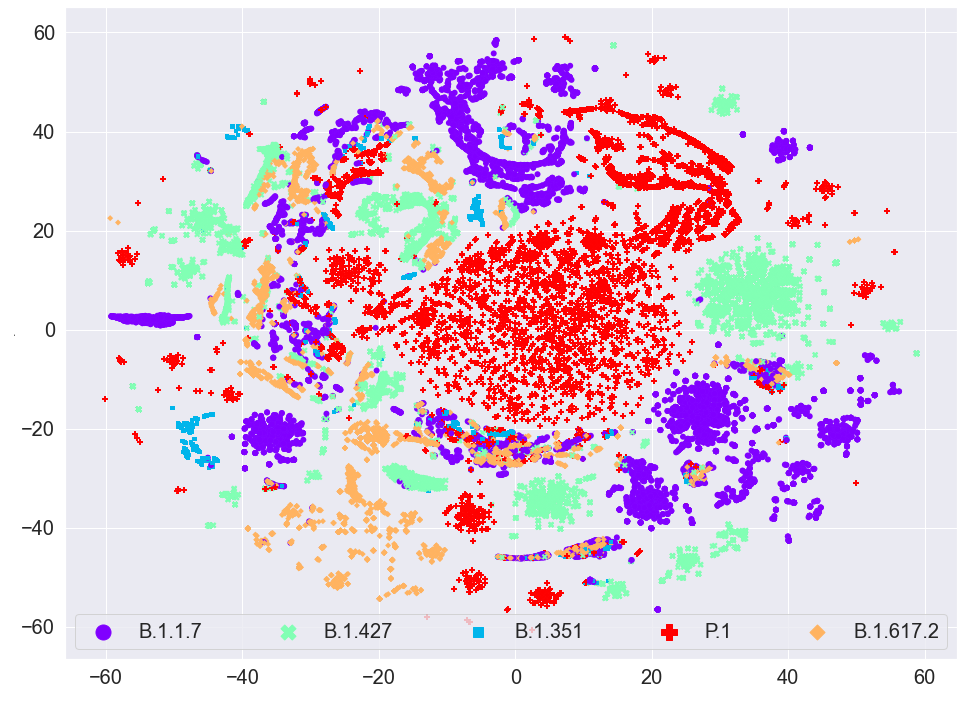

In [58]:
colors = cm.rainbow(np.linspace(0, 1, len(np.unique(host_names_new))))
len(np.unique(host_names_new))

hst = np.unique(host_names_new)
order_top_hosts =  host_names_new

colors_top_hosts = {hst[0] : colors[0], hst[1] : colors[1],
                      hst[2] : colors[2], hst[3]: colors[3],  
                      hst[4] : colors[4]}

data_frame_top_hosts = pd.DataFrame({' ': 
                                   np.array(X_embedded[:,0]), 
                           '.': np.array(X_embedded[:,1]), 
                           'Variants:': host_names_new})

sns.set(rc={'figure.figsize':(16,12)})

sns.scatterplot(x = ' ', 
            y = '.', 
            hue = 'Variants:', 
            hue_order = order_top_hosts,
#             markers = ordered_markers_top_hosts,
            palette = colors_top_hosts,
            data = data_frame_top_hosts,           
#             legend = 'full',
#             ax = ax12,
#             s = 100,
            linewidth=0.01,
            style = 'Variants:')
# plt.ylim(-100, 80)
# plt.xlim(-80, 80)
# plt.xlabel("Steps Taken Per Day", fontsize=14)
# plt.ylabel("Calories Burned Per Day", fontsize=14)
plt.tick_params(labelsize=20)
# plt.legend(fontsize=0)
# plt.legend(fontsize=30, mode = "expand", ncol = 5)
# lgnd = plt.legend(loc="lower left", numpoints=1, fontsize=10)

lgnd = plt.legend(loc="lower left", scatterpoints=1, fontsize=20, mode = "expand", ncol = 5)
for handle in lgnd.legendHandles:
    handle.set_sizes([226.0])

write_path = "D:/University/RA/Visualisation/Clustering_Results/clustering_tnse_plot.png"
plt.savefig(write_path)

In [63]:
read_path = "D:/University/RA/Visualisation/Clustering_Results/kmeans_lasso.csv"

clusters_5 = []
month_info = []
variant_info = []
country_info = []
year_info = []

with open(read_path) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        tmp = row
        clusters_5.append(int(tmp[1]))
        variant_info.append((tmp[9]))
        country_info.append((tmp[10]))
        month_info.append(int(tmp[13]))
        year_info.append(int(tmp[15]))

In [204]:
idx = pd.Index(country_info) # creates an index which allows counting the entries easily
print('Month:' + str(i) + ' \n', len(idx),"entries in total")
aq = (idx.value_counts())
print(aq)

Month:12 
 62657 entries in total
USA        32579
India       3962
Canada      3802
England     2841
Brazil      2073
           ...  
Panama         1
Belize         1
Brunei         1
Rwanda         1
Reunion        1
Length: 90, dtype: int64


In [205]:
# month_range = [1,2,3,4,5,6,12]
for i in range(1,13):
    month_arr = []
    variant_arr = []
    for j in range(len(clusters_5)):
        if country_info[j]=="India":
            if month_info[j]==i:
                month_arr.append(month_info[j])
                variant_arr.append(variant_info[j])

    idx = pd.Index(variant_arr) # creates an index which allows counting the entries easily
    print('Month:' + str(i) + ' \n', len(idx),"entries in total")
    aq = (idx.value_counts())
#     print(aq)
    for k in range(len(aq)):
        aq.iloc[k] = aq[k]/len(idx)
    print(aq)

Month:1 
 8 entries in total
B.1.1.7    1.0
dtype: float64
Month:2 
 120 entries in total
B.1.1.7      0.800000
B.1.617.2    0.108333
B.1.351      0.091667
dtype: float64
Month:3 
 597 entries in total
B.1.617.2    0.587940
B.1.1.7      0.371859
B.1.351      0.040201
dtype: float64
Month:4 
 1672 entries in total
B.1.617.2    0.910287
B.1.1.7      0.063995
B.1.351      0.025718
dtype: float64
Month:5 
 1366 entries in total
B.1.617.2    0.991215
B.1.351      0.006589
B.1.1.7      0.002196
dtype: float64
Month:6 
 13 entries in total
B.1.617.2    1.0
dtype: float64
Month:7 
 0 entries in total
Series([], dtype: int64)
Month:8 
 0 entries in total
Series([], dtype: int64)
Month:9 
 1 entries in total
B.1.1.7    1.0
dtype: float64
Month:10 
 0 entries in total
Series([], dtype: int64)
Month:11 
 4 entries in total
B.1.1.7    1.0
dtype: float64
Month:12 
 48 entries in total
B.1.1.7      0.916667
B.1.351      0.041667
B.1.617.2    0.041667
dtype: float64


In [209]:
# General data for all countries
B_1_427 = [0.661765,0.705958,0.497602,0.292447,0.090585,0.028814,0.004310]
B_1_1_7 = [0.136555,0.172573,0.313631,0.348943,0.194716,0.170220,0.063521]
P_1 = [0.119748,0.083975,0.137088,0.288746,0.604674,0.598473,0.327586]
B_1_351 = [0.079832,0.037494,0.049513,0.042674,0.014270,0.015200,0.015653]
B_1_617_2 = [0.002101,0,0.002166,0.027190,0.095755,0.187293,0.588929]


# Data for USA
B_1_427_USA = [0.987362,0.979863,0.832283,0.535548,0.161772,0.057381,0.020652]
B_1_1_7_USA = [0.012638,0.016900,0.154593,0.253555,0.129265,0.049659,0.008696]
P_1_USA = [0,0.002877,0.012073,0.205829,0.694136,0.856927,0.850000]
B_1_351_USA = [0,0.000360,0.001050,0.004364,0.004182,0.003634,0]
B_1_617_2_USA = [0,0,0,0.000704,0.010645,0.032400,0.120652]


# Data for INDIA
B_1_427_India = [0,0,0,0,0,0,0]
B_1_1_7_India = [0.916667,1,0.800000,0.371859,0.063995,0.002196,0]
P_1_India = [0,0,0,0,0,0,0]
B_1_351_India = [0.041667,0,0.091667,0.040201,0.025718,0.006589,0]
B_1_617_2_India = [0.041667,0,0.108333,0.587940,0.910287,0.991215,1]


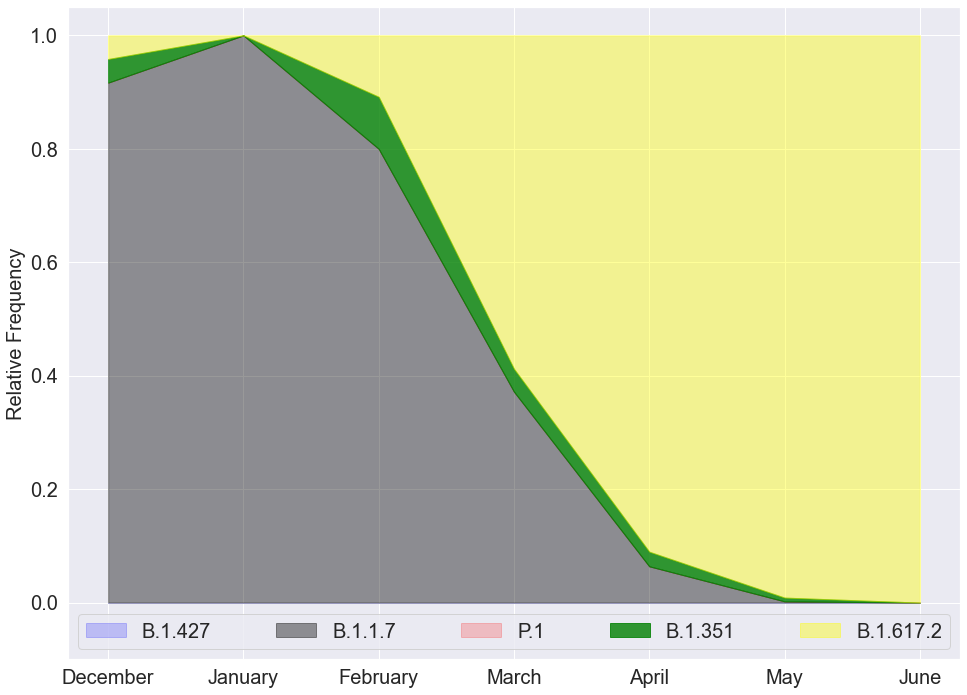

In [211]:
import matplotlib.pyplot as plt

B_1_427 = [0,0,0,0,0,0,0]
B_1_1_7 = [0.916667,1,0.800000,0.371859,0.063995,0.002196,0]
P_1 = [0,0,0,0,0,0,0]
B_1_351 = [0.041667,0,0.091667,0.040201,0.025718,0.006589,0]
B_1_617_2 = [0.041667,0,0.108333,0.587940,0.910287,0.991215,1]

# B_1_427 =   B_1_427_USA
# B_1_1_7 =   [B_1_427[0] + B_1_1_7_USA[0],B_1_427[1] + B_1_1_7_USA[1],B_1_427[2] + B_1_1_7_USA[2],B_1_427[3] + B_1_1_7_USA[3],B_1_427[4] + B_1_1_7_USA[4],B_1_427[5] + B_1_1_7_USA[5],B_1_427[6] + B_1_1_7_USA[6]]
# P_1 =       [B_1_1_7[0] + P_1_USA[0],B_1_1_7[1] + P_1_USA[1],B_1_1_7[2] + P_1_USA[2],B_1_1_7[3] + P_1_USA[3],B_1_1_7[4] + P_1_USA[4],B_1_1_7[5] + P_1_USA[5],B_1_1_7[6] + P_1_USA[6]]
# B_1_351 =   [P_1[0] + B_1_351_USA[0],P_1[1] + B_1_351_USA[1],P_1[2] + B_1_351_USA[2],P_1[3] + B_1_351_USA[3],P_1[4] + B_1_351_USA[4],P_1[5] + B_1_351_USA[5],P_1[6] + B_1_351_USA[6]]
# B_1_617_2 = [B_1_351[0] + B_1_617_2_USA[0], B_1_351[1] + B_1_617_2_USA[1],B_1_351[2] + B_1_617_2_USA[2],B_1_351[3] + B_1_617_2_USA[3],B_1_351[4] + B_1_617_2_USA[4],B_1_351[5] + B_1_617_2_USA[5],B_1_351[6] + B_1_617_2_USA[6]]

B_1_427 =   B_1_427_India
B_1_1_7 =   [B_1_427[0] + B_1_1_7_India[0],B_1_427[1] + B_1_1_7_India[1],B_1_427[2] + B_1_1_7_India[2],B_1_427[3] + B_1_1_7_India[3],B_1_427[4] + B_1_1_7_India[4],B_1_427[5] + B_1_1_7_India[5],B_1_427[6] + B_1_1_7_India[6]]
P_1 =       [B_1_1_7[0] + P_1_India[0],B_1_1_7[1] + P_1_India[1],B_1_1_7[2] + P_1_India[2],B_1_1_7[3] + P_1_India[3],B_1_1_7[4] + P_1_India[4],B_1_1_7[5] + P_1_India[5],B_1_1_7[6] + P_1_India[6]]
B_1_351 =   [P_1[0] + B_1_351_India[0],P_1[1] + B_1_351_India[1],P_1[2] + B_1_351_India[2],P_1[3] + B_1_351_India[3],P_1[4] + B_1_351_India[4],P_1[5] + B_1_351_India[5],P_1[6] + B_1_351_India[6]]
B_1_617_2 = [B_1_351[0] + B_1_617_2_India[0], B_1_351[1] + B_1_617_2_India[1],B_1_351[2] + B_1_617_2_India[2],B_1_351[3] + B_1_617_2_India[3],B_1_351[4] + B_1_617_2_India[4],B_1_351[5] + B_1_617_2_India[5],B_1_351[6] + B_1_617_2_India[6]]


# Data
x =  [1,2,3,4,5,6,7]
# y1 = [10,20,40,55,58,55,50,40,20,10]

# Shade the area between y1 and line y=0
plt.fill_between(x, B_1_427, 0,facecolor="white", # The fill color
                 color='blue',       # The outline color
                 alpha=0.2)          # Transparency of the fill
plt.fill_between(x, B_1_1_7, B_1_427,facecolor="white", # The fill color
                 color='black',       # The outline color
                 alpha=0.4)          # Transparency of the fill
plt.fill_between(x, P_1, B_1_1_7,facecolor="white", # The fill color
                 color='red',       # The outline color
                 alpha=0.2)          # Transparency of the fill
plt.fill_between(x, B_1_351, P_1,facecolor="white", # The fill color
                 color='green',       # The outline color
                 alpha=0.8)          # Transparency of the fill
plt.fill_between(x, B_1_617_2, B_1_351,facecolor="white", # The fill color
                 color='yellow',       # The outline color
                 alpha=0.4)          # Transparency of the fill
plt.ylim(-0.1, 1.05)
plt.tick_params(labelsize=20)
plt.ylabel("Relative Frequency",fontsize=20)
plt.xticks([1, 2, 3, 4, 5, 6, 7], ['December', 'January', 'February', 'March', 'April', 'May', 'June'])
lgnd = plt.legend(['B.1.427','B.1.1.7','P.1','B.1.351','B.1.617.2'],loc="lower left", scatterpoints=1, fontsize=20, mode = "expand", ncol = 5 )
# lgnd = plt.legend(loc="lower left", scatterpoints=1, fontsize=20, mode = "expand", ncol = 5)
# for handle in lgnd.legendHandles:
#     handle.set_sizes([226.0])
write_path = "D:/University/RA/Visualisation/Clustering_Results/India_fill_line_plot_lasso.png"
plt.savefig(write_path)
plt.show()

